In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1050,2020-07-20,United Kingdom,295081.0,294792.0,45430.0,45300.0,289.0,130.0
1051,2020-07-20,Germany,202156.0,201823.0,9094.0,9086.0,333.0,8.0
1052,2020-07-20,Iran,275119.0,273788.0,14149.0,14188.0,1331.0,-39.0
1053,2020-07-20,Turkey,219610.0,219641.0,5492.0,5491.0,-31.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3056.900473933649
RMSE =  7669.049358093351


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  294.46445497630333
RMSE =  689.1115882370967


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15676.127450980392
RMSE =  20595.817406387512
-- World performances for deaths --
MAE =  1544.9803921568628
RMSE =  1884.128372879671


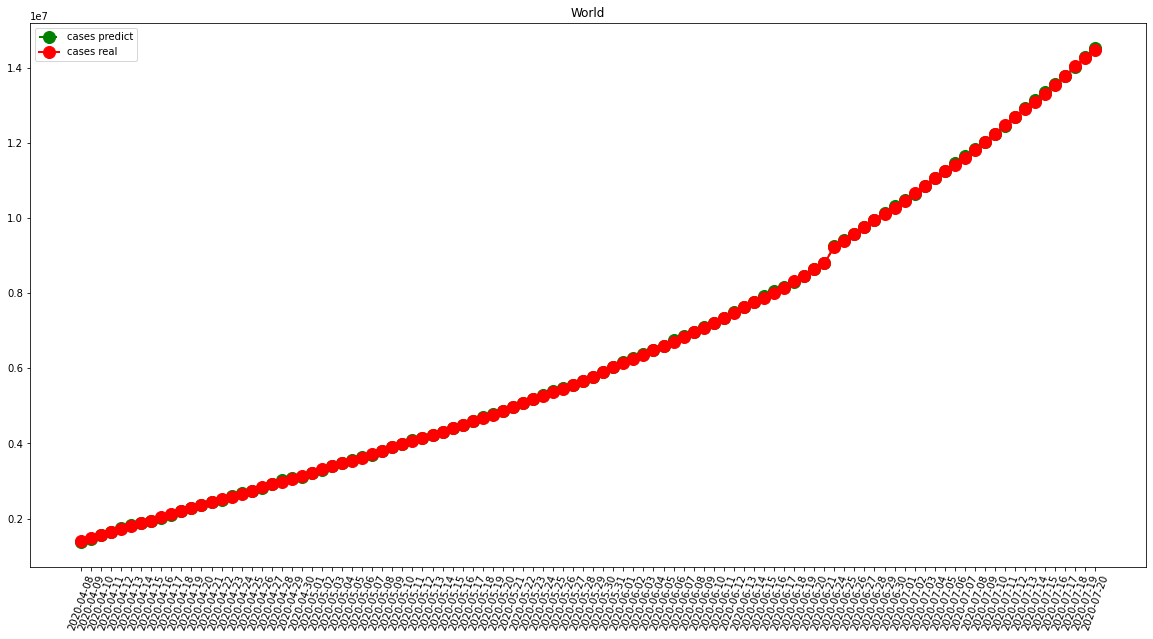

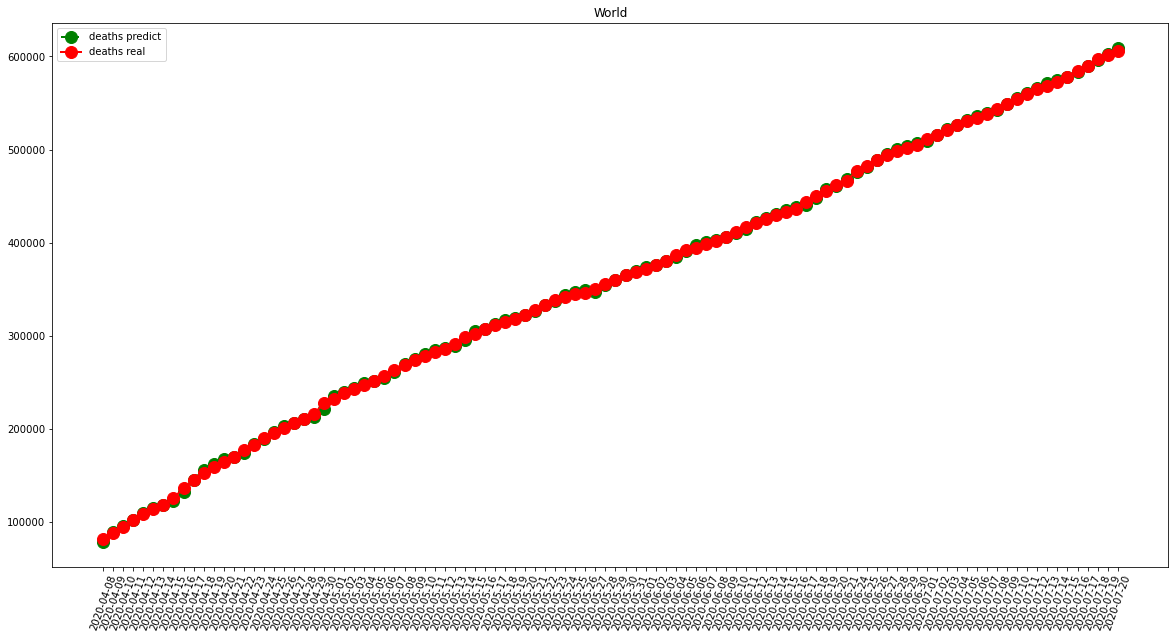

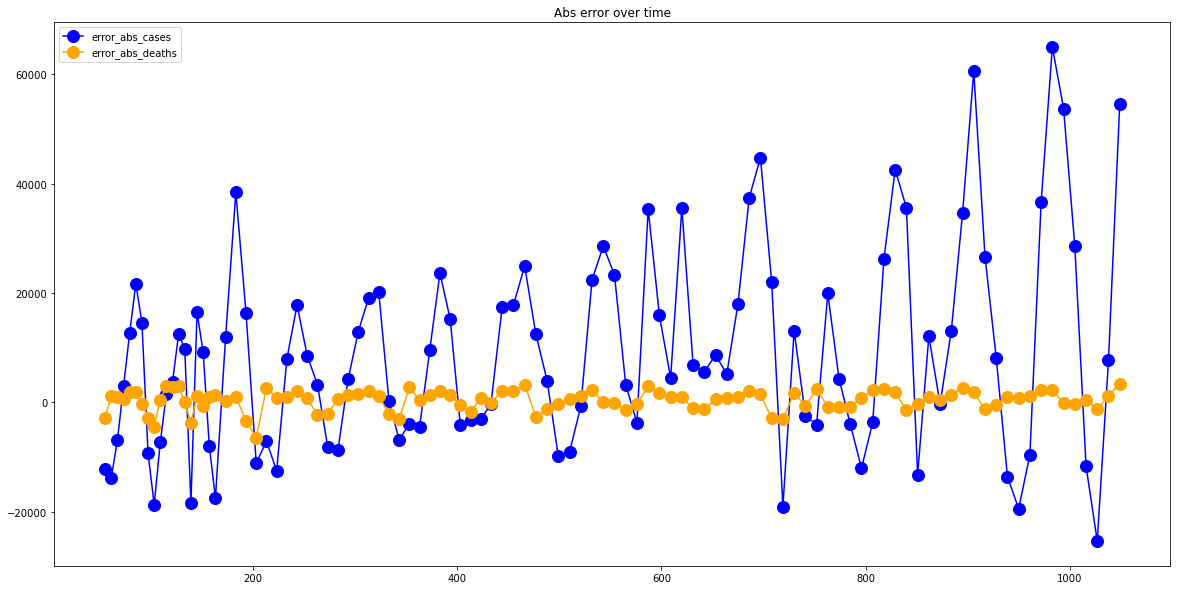

In [7]:
visShow("World")

-- France performances for cases --
MAE =  838.6875
RMSE =  1384.7325199422862
-- France performances for deaths --
MAE =  159.89285714285714
RMSE =  316.6498742414765


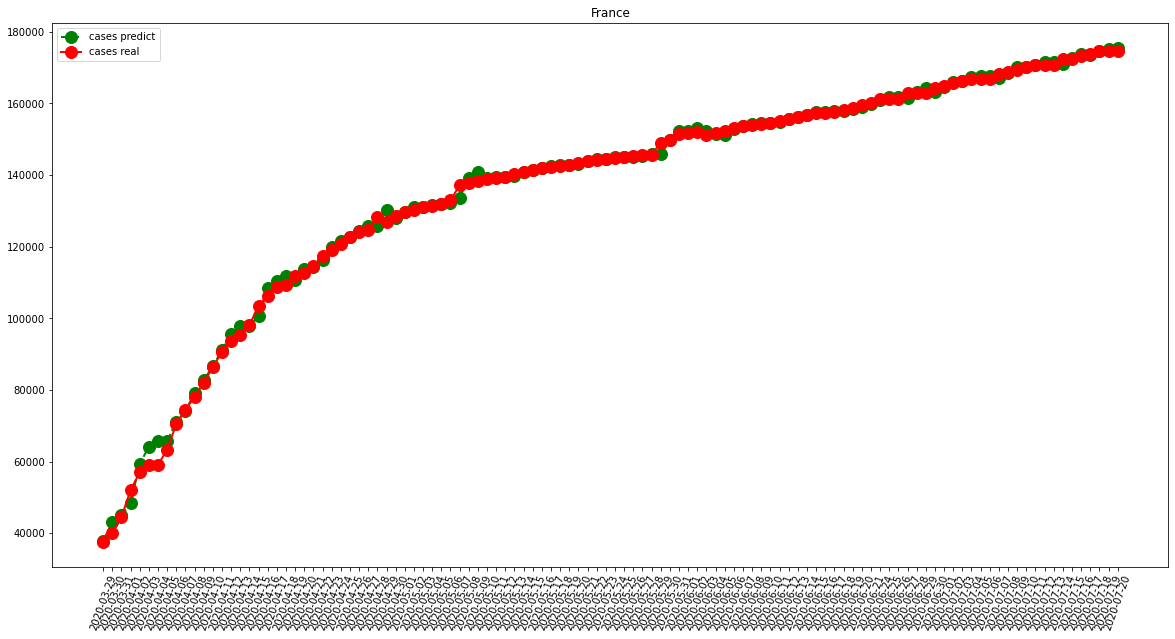

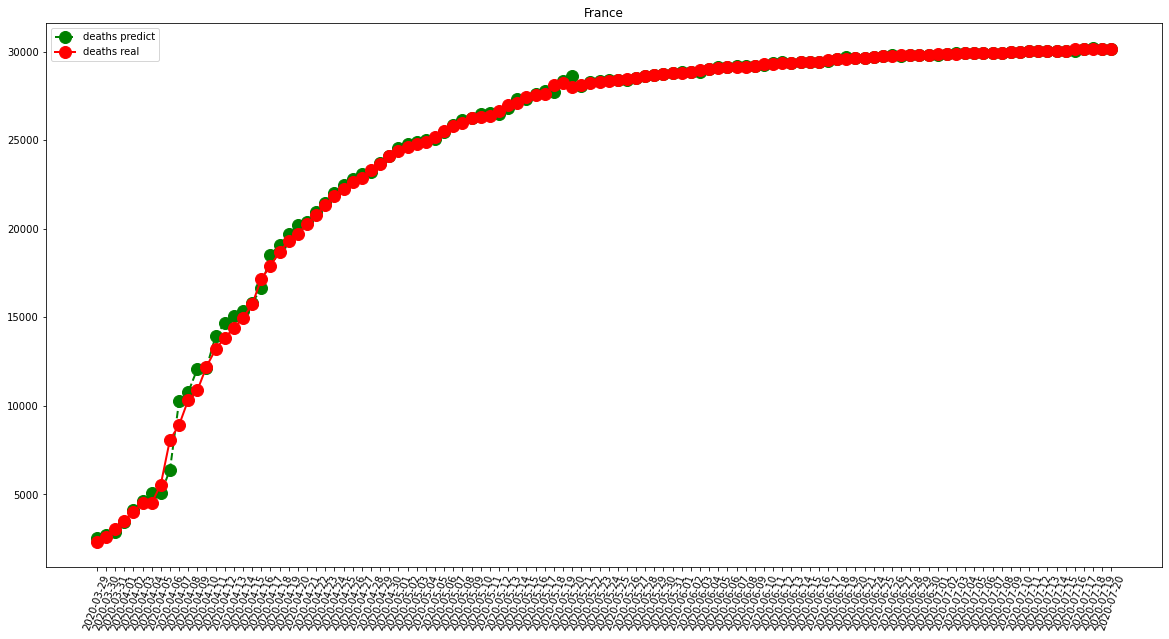

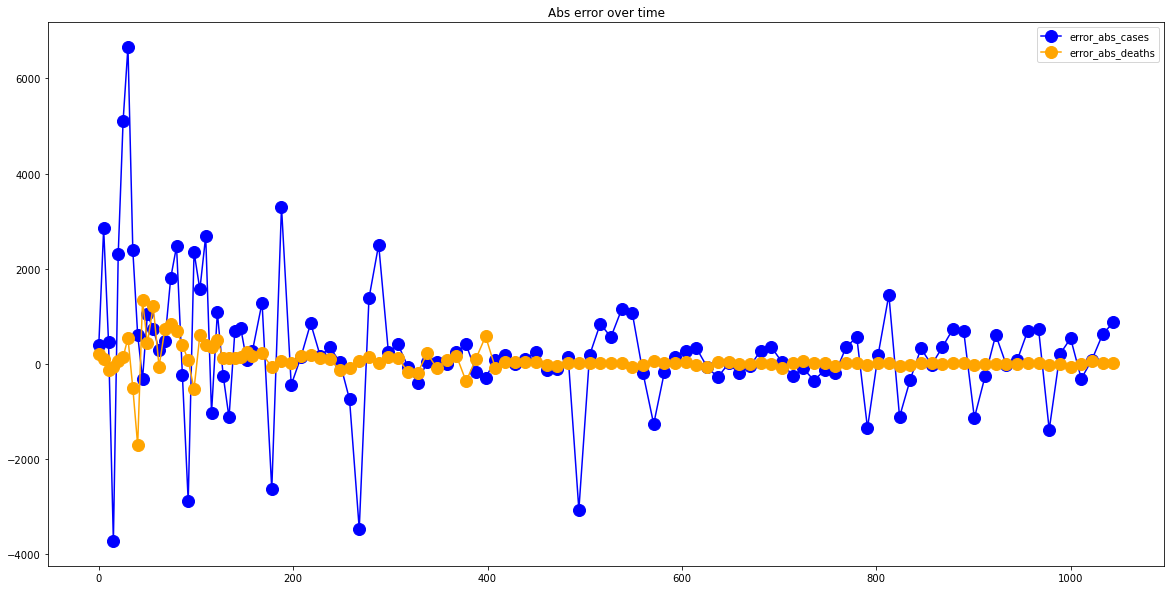

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  345.1517857142857
RMSE =  514.4660980778311
-- Italy performances for deaths --
MAE =  89.69642857142857
RMSE =  279.56742733832823


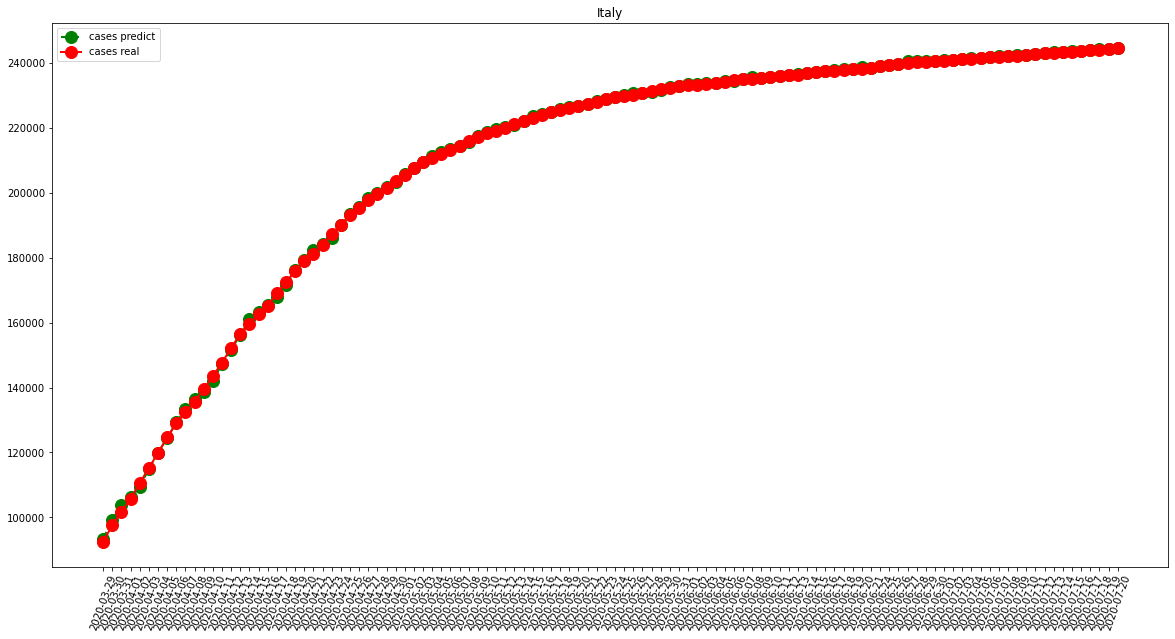

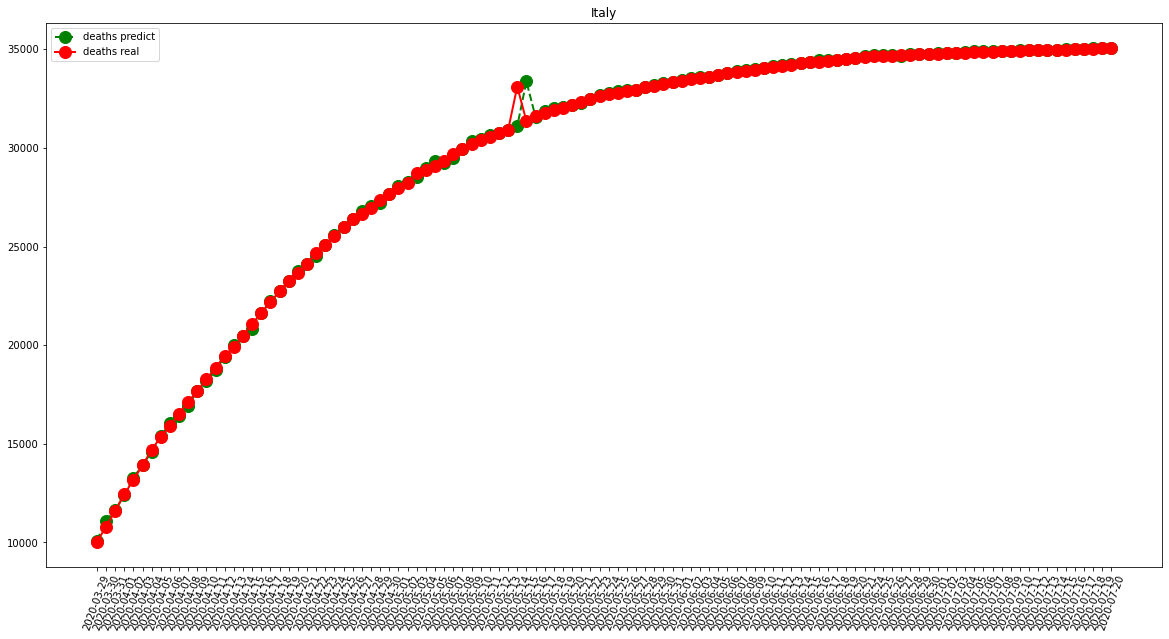

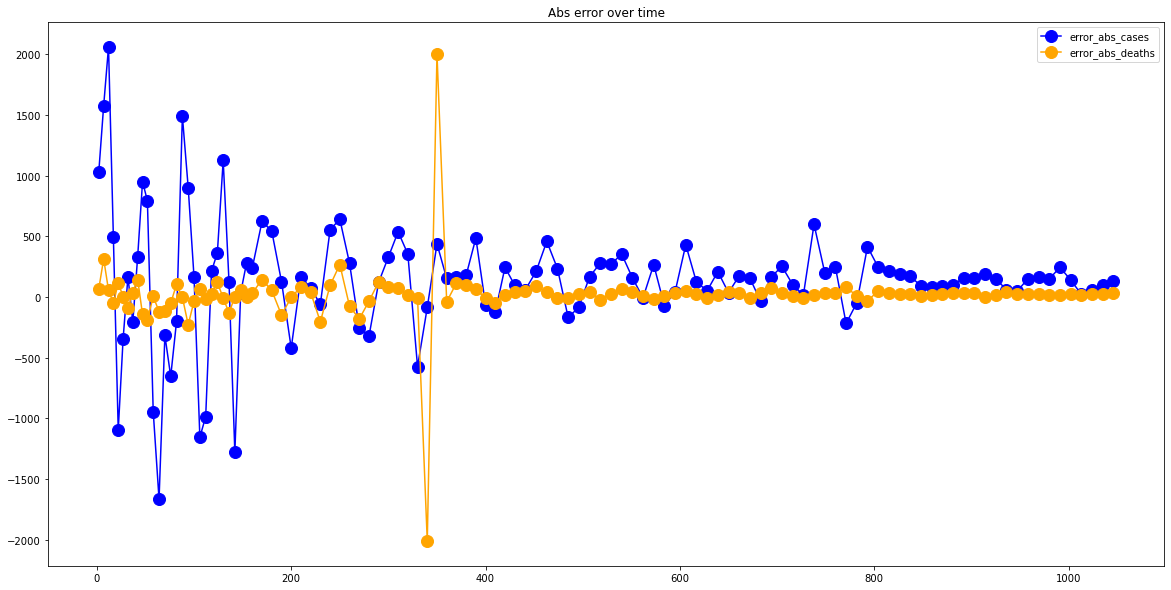

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  852.5357142857143
RMSE =  1961.2813868926173
-- Spain performances for deaths --
MAE =  163.34821428571428
RMSE =  383.5472009507342


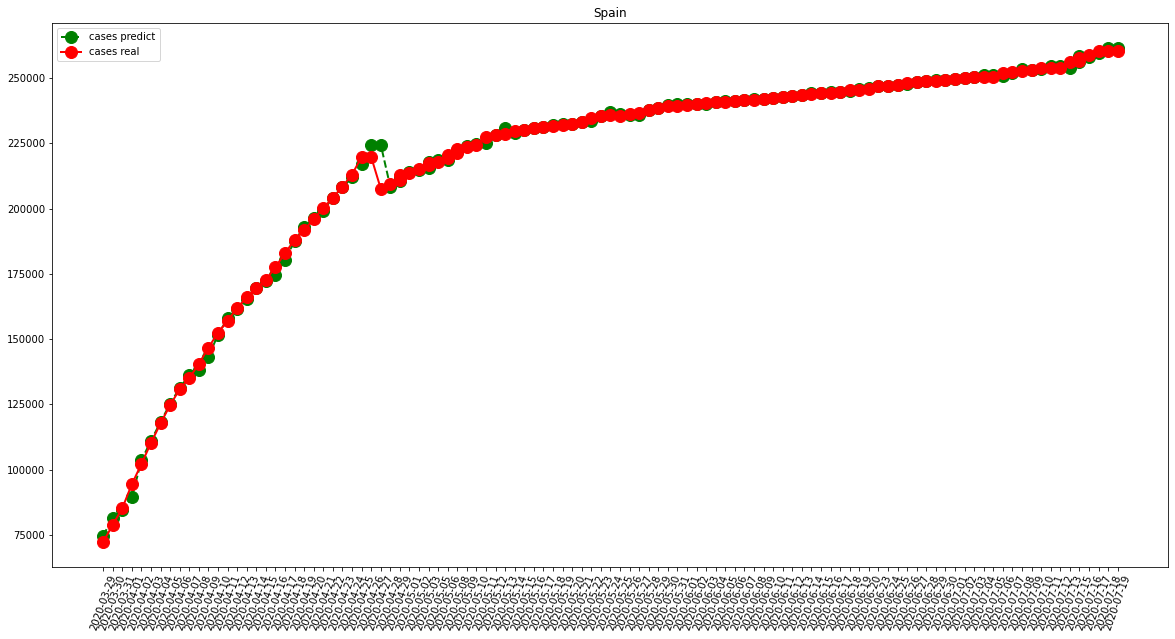

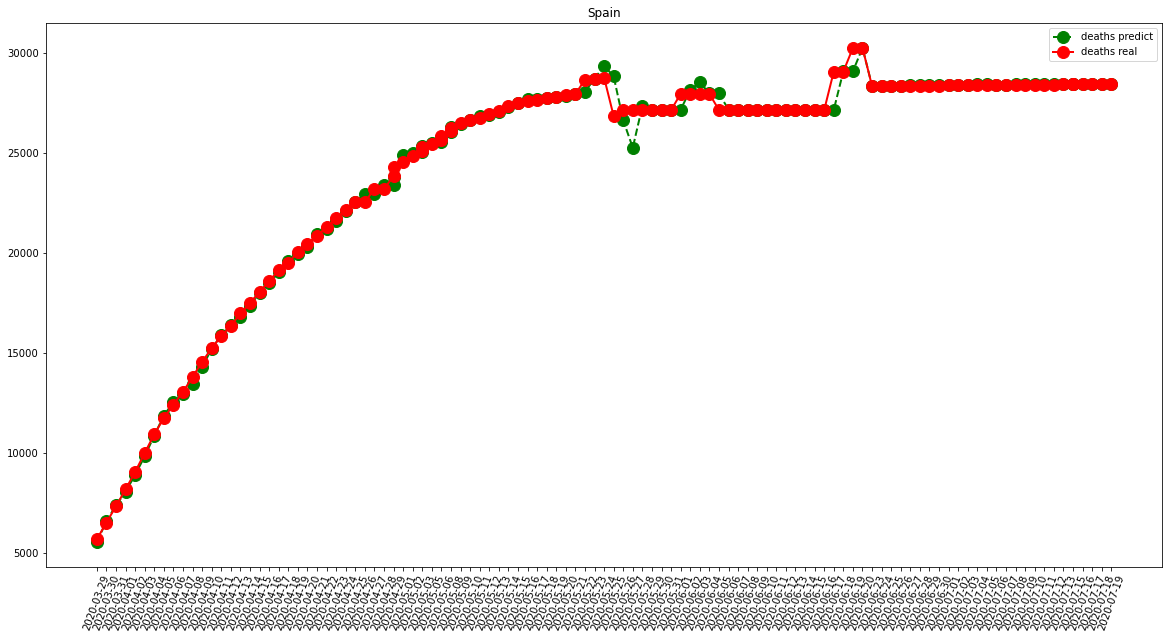

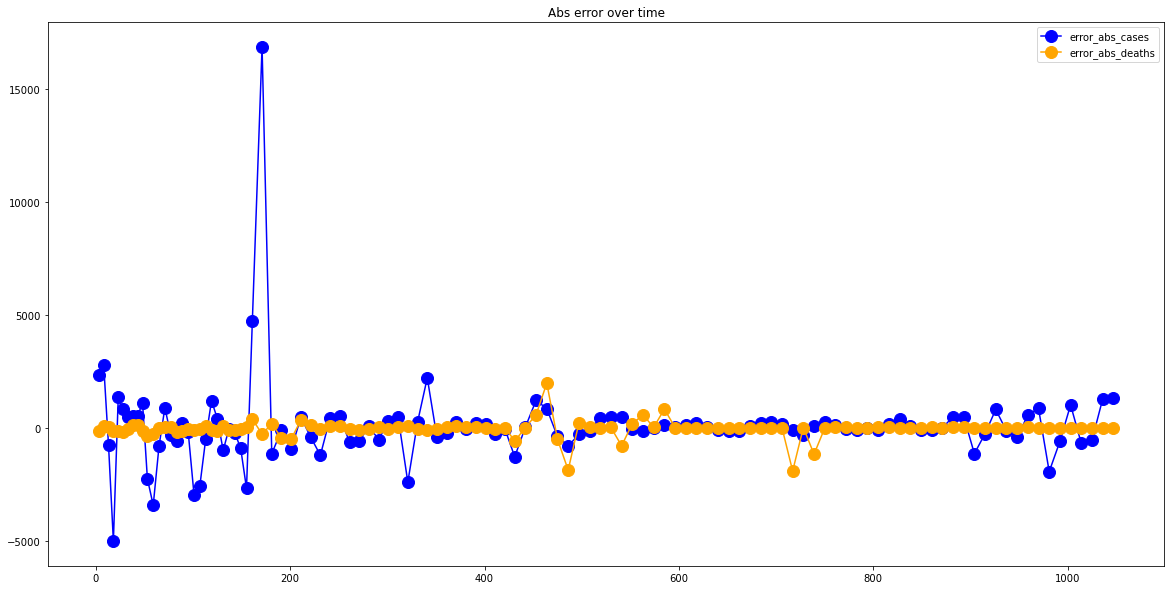

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5472.366071428572
RMSE =  7459.643976687398
-- United States performances for deaths --
MAE =  511.05357142857144
RMSE =  747.0903918345011


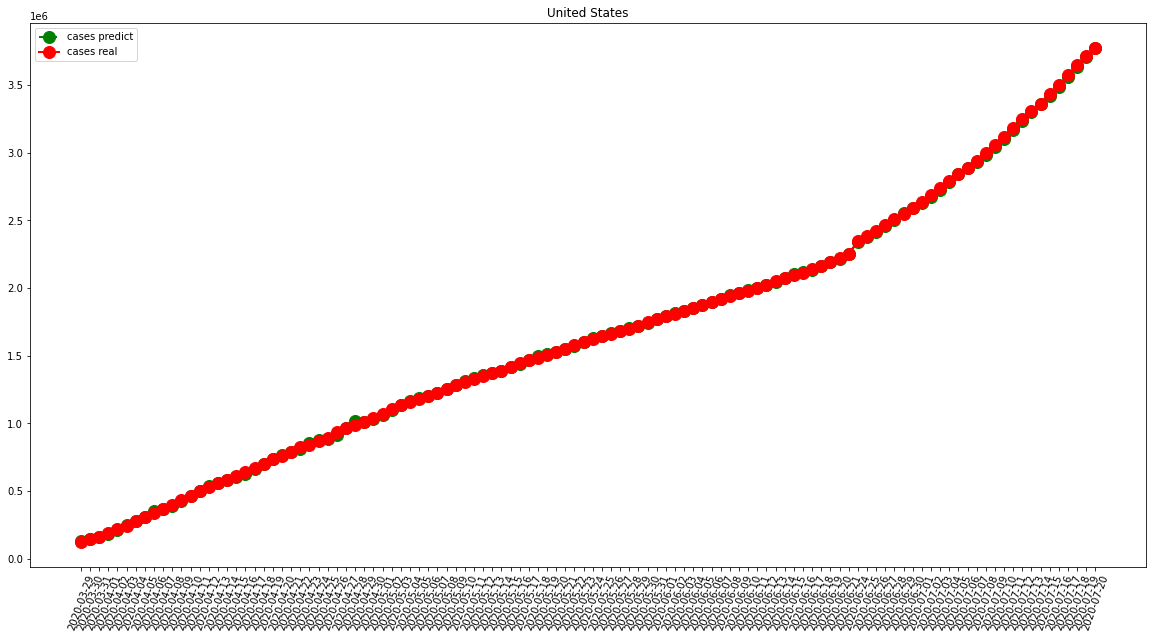

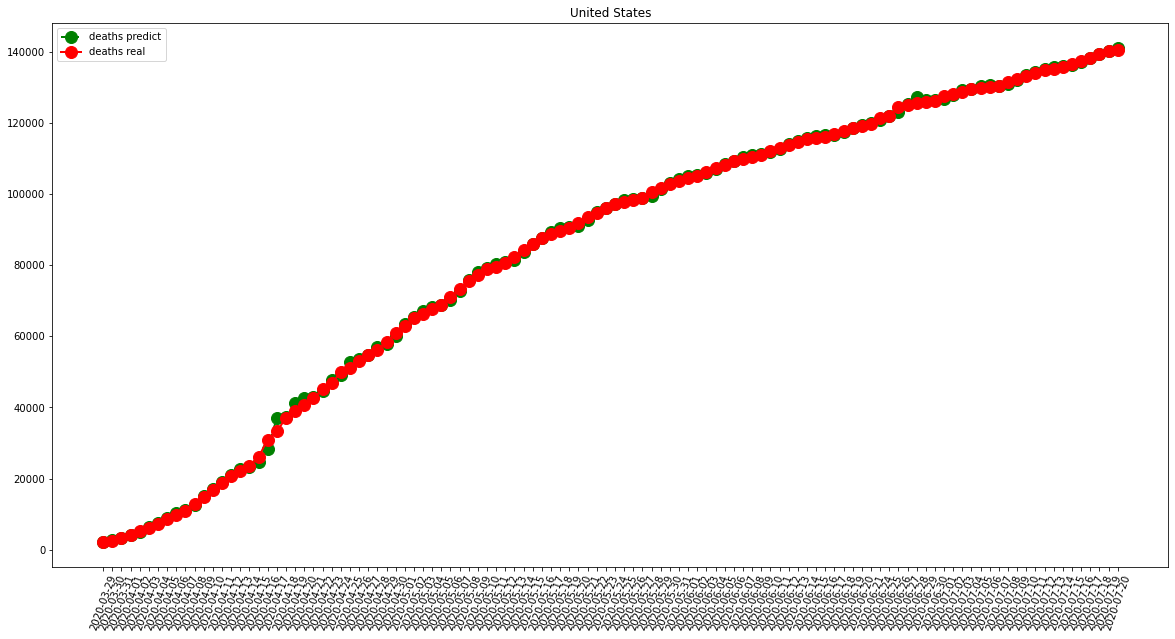

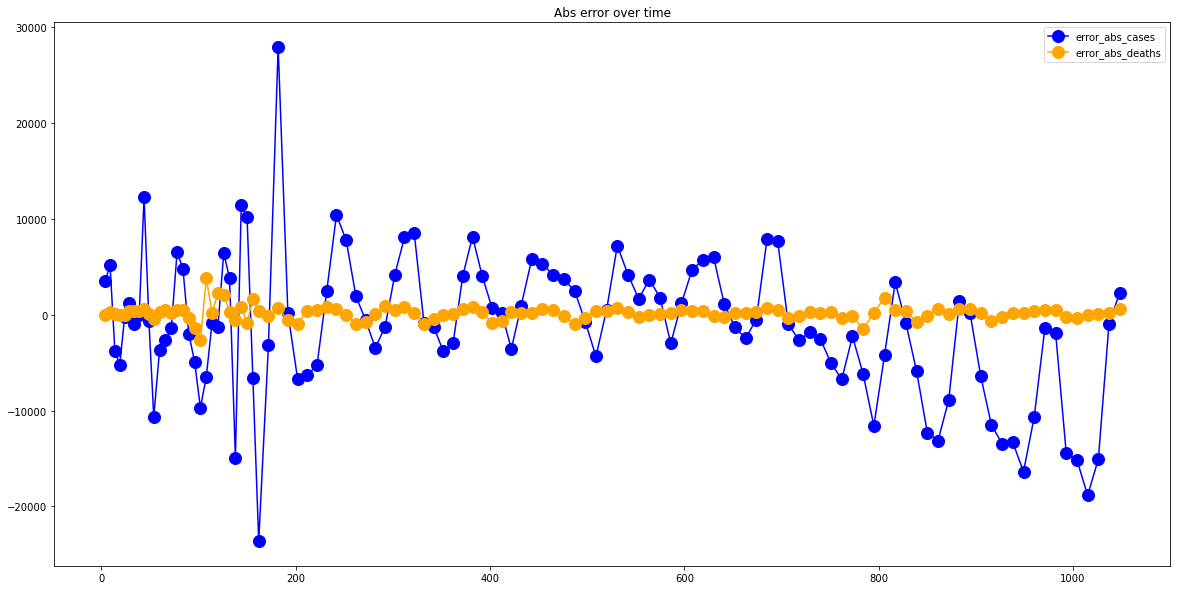

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  82.00892857142857
RMSE =  111.69461714872386
-- China performances for deaths --
MAE =  35.232142857142854
RMSE =  148.33173487635264


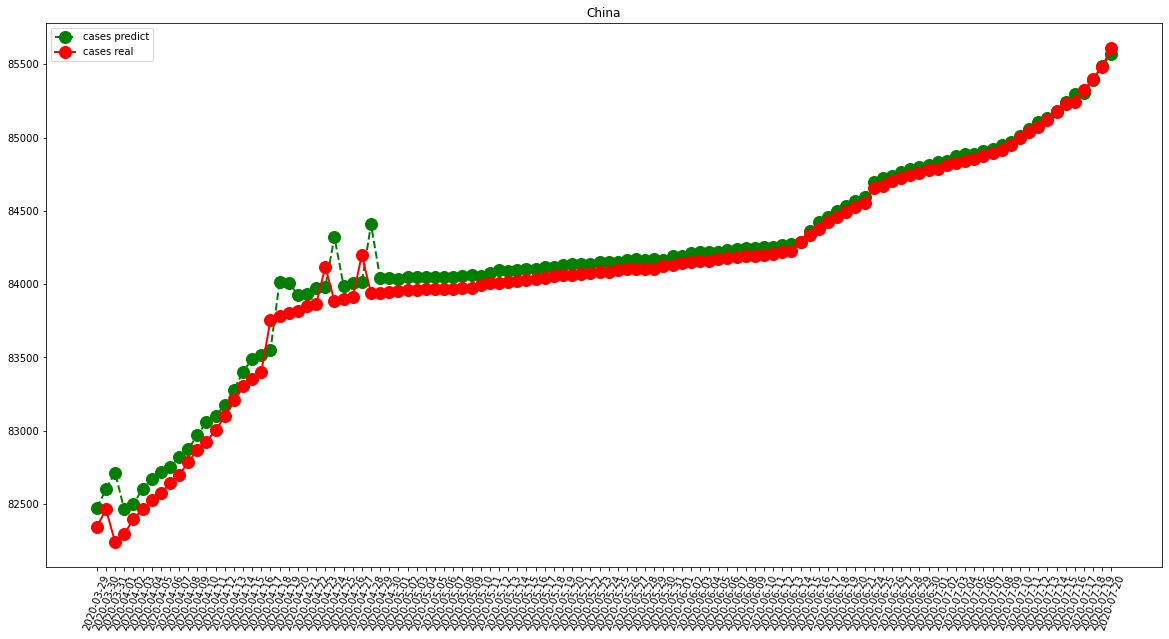

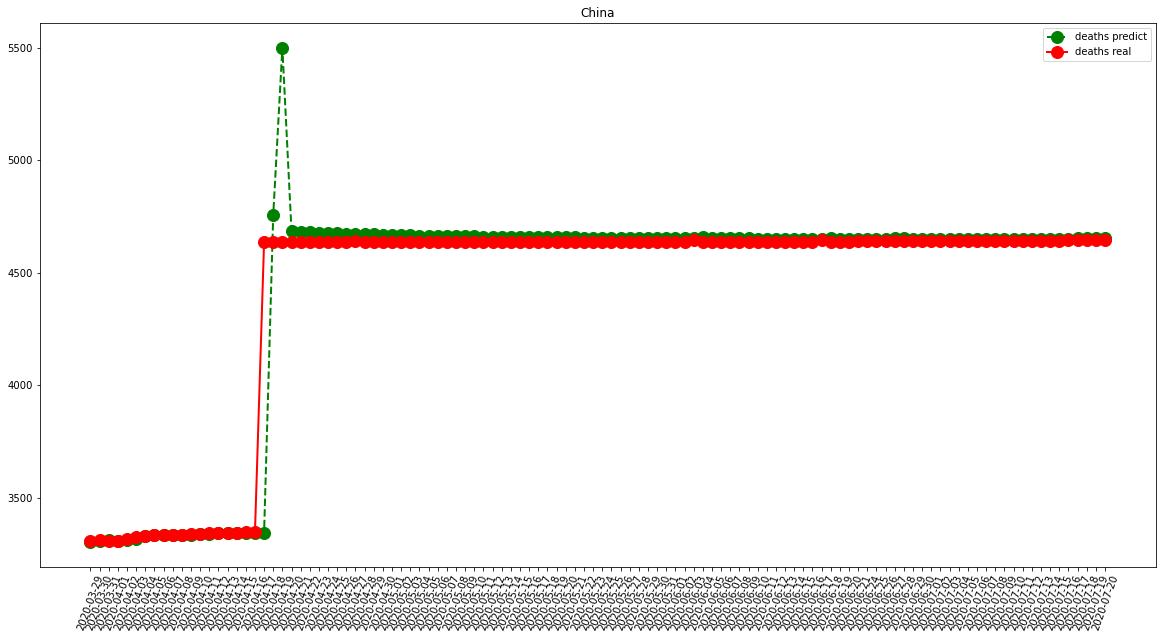

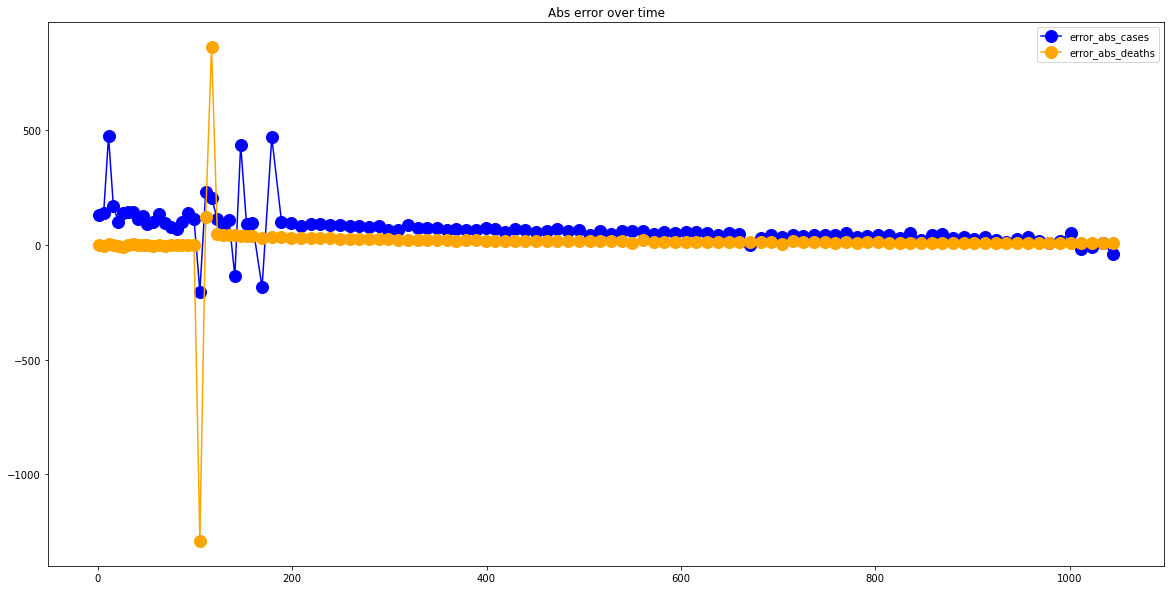

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1417.3690476190477
RMSE =  4552.008461735796
-- United Kingdom performances for deaths --
MAE =  220.1547619047619
RMSE =  534.8003966768483


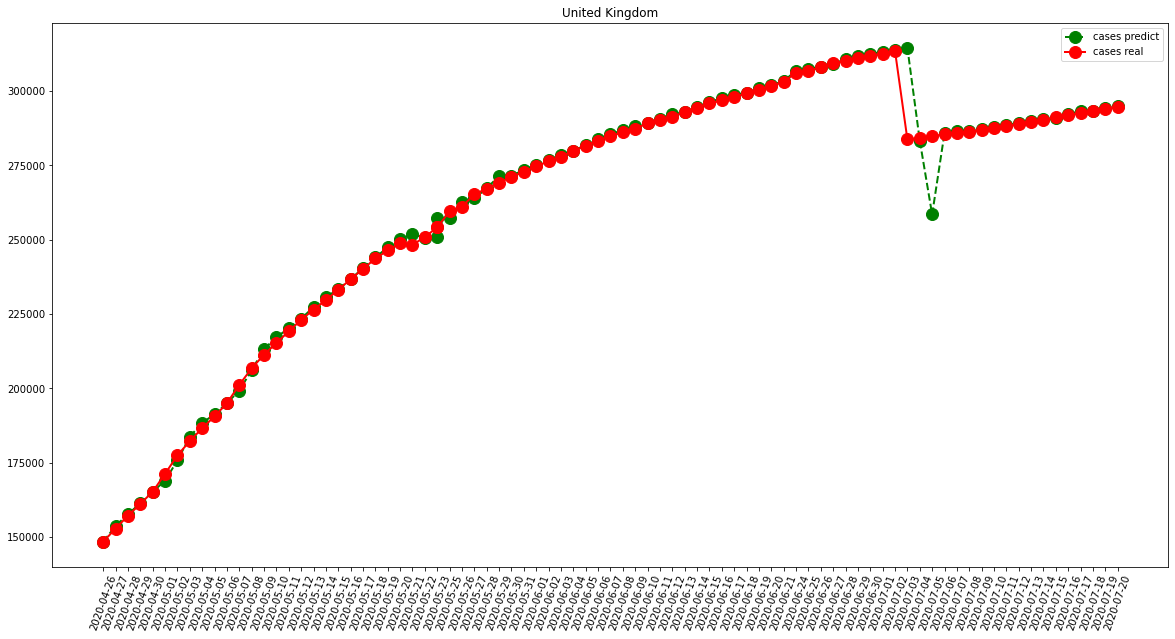

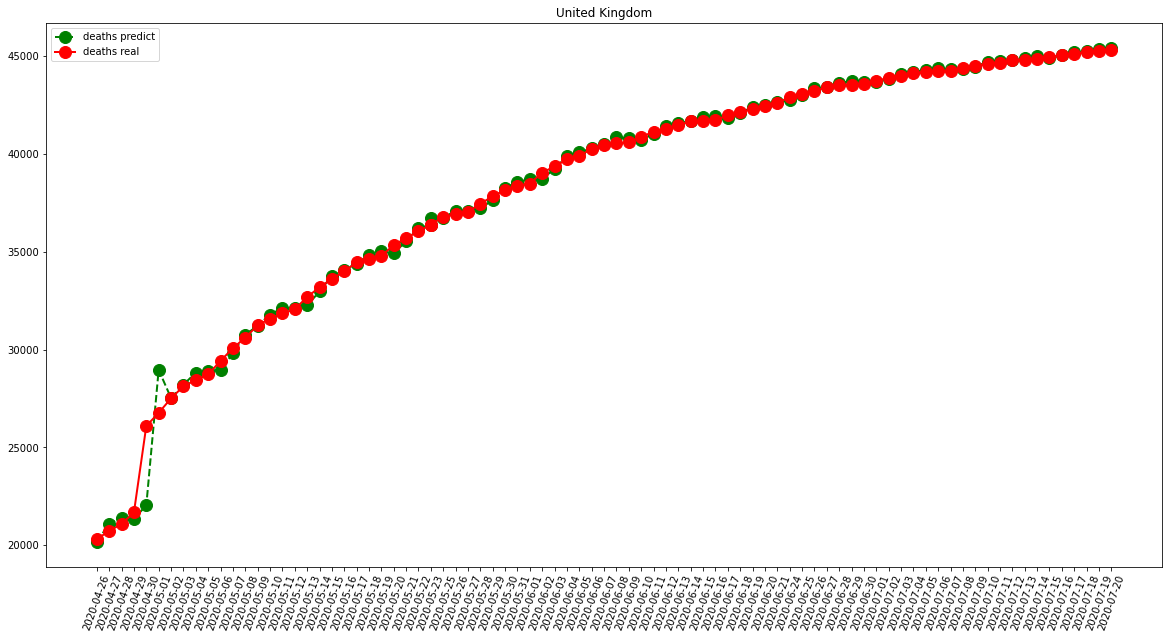

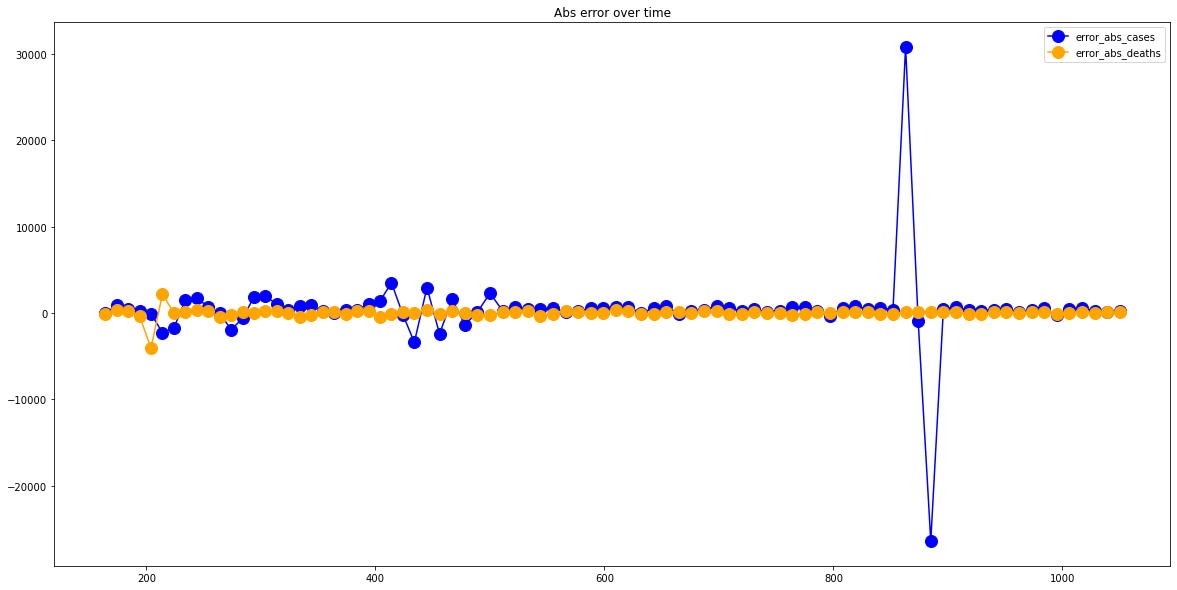

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  298.9761904761905
RMSE =  418.65035417113774
-- Germany performances for deaths --
MAE =  27.928571428571427
RMSE =  47.61177325390173


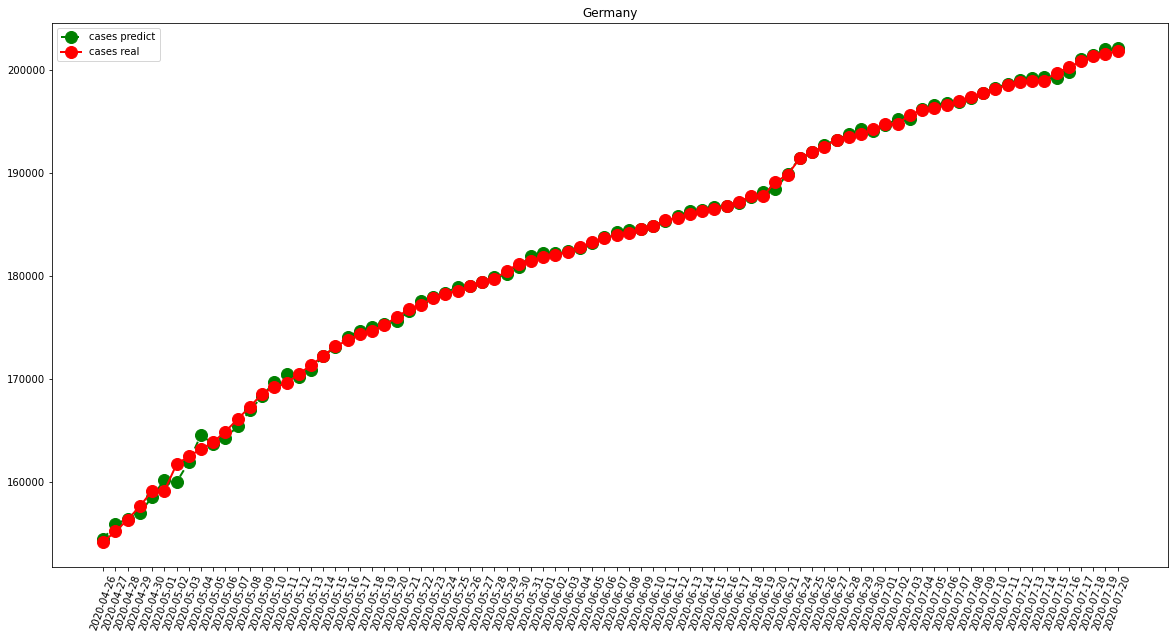

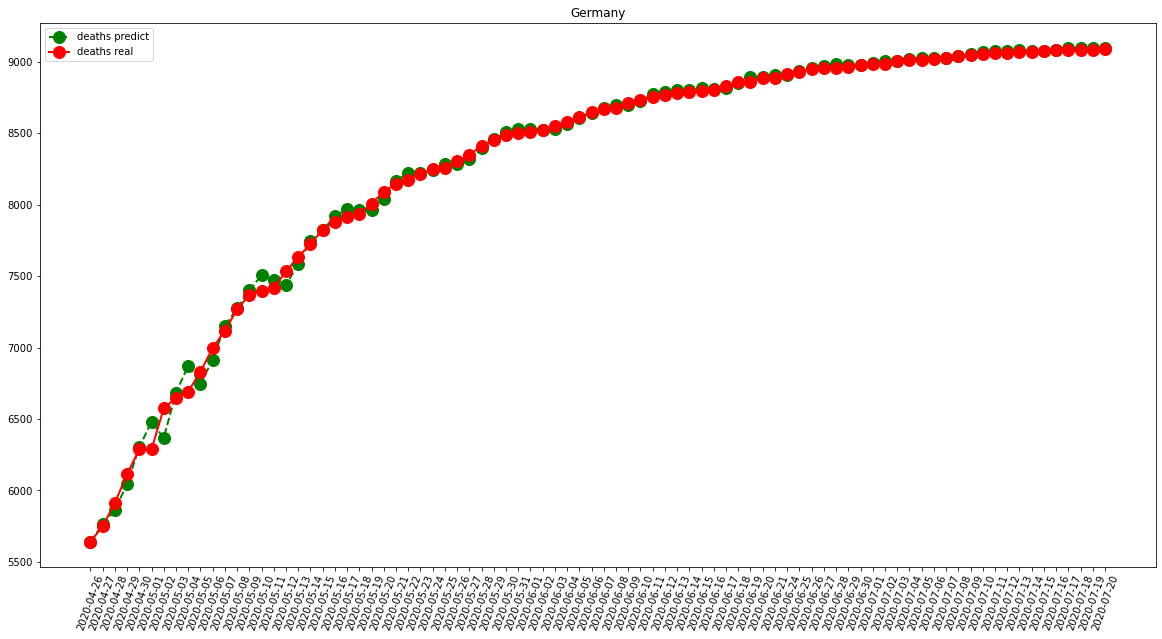

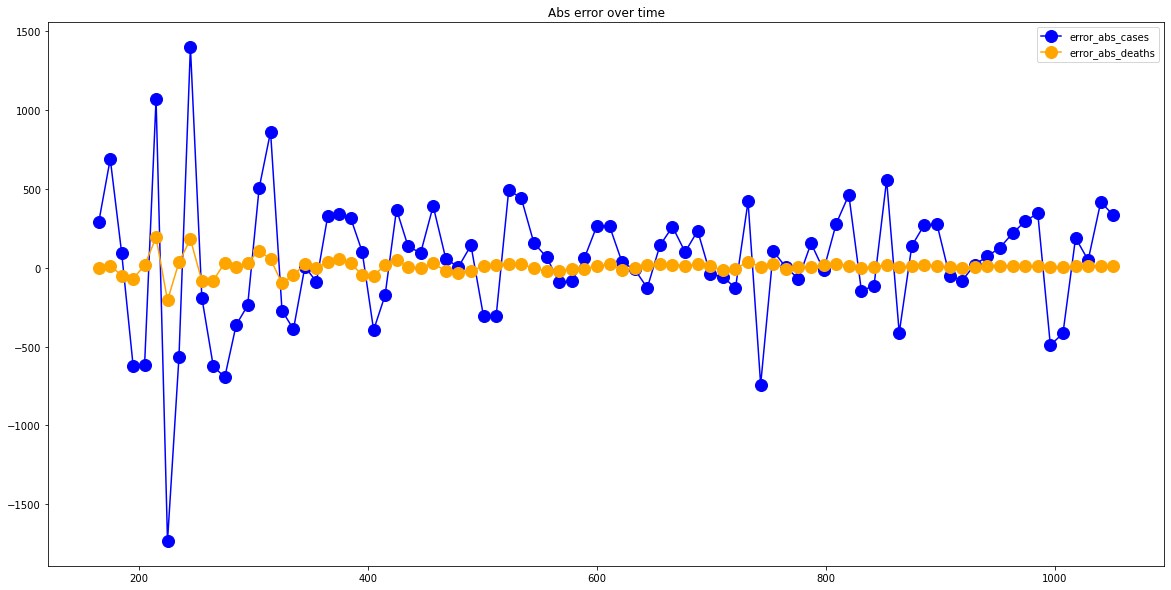

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  400.5238095238095
RMSE =  523.9816654371465
-- Iran performances for deaths --
MAE =  19.166666666666668
RMSE =  29.609361454011225


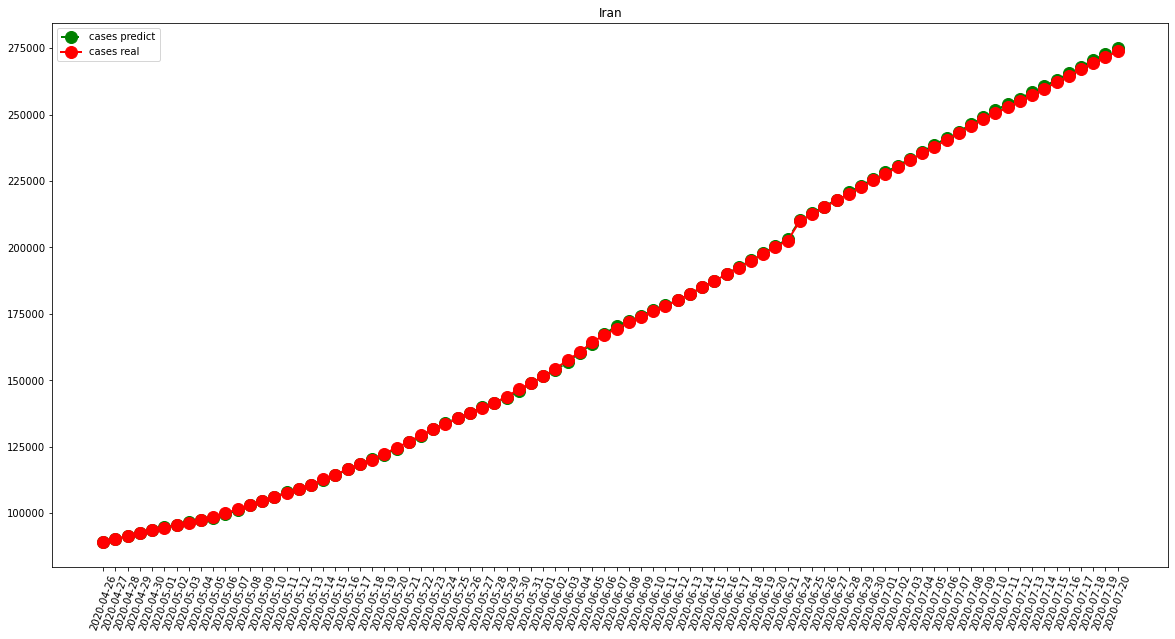

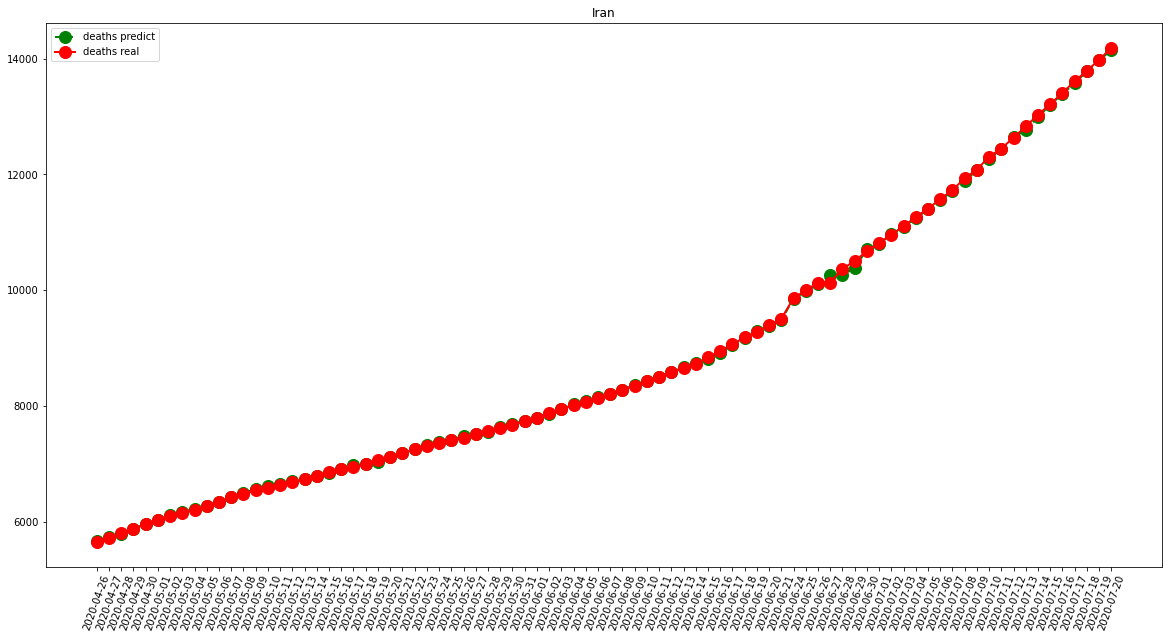

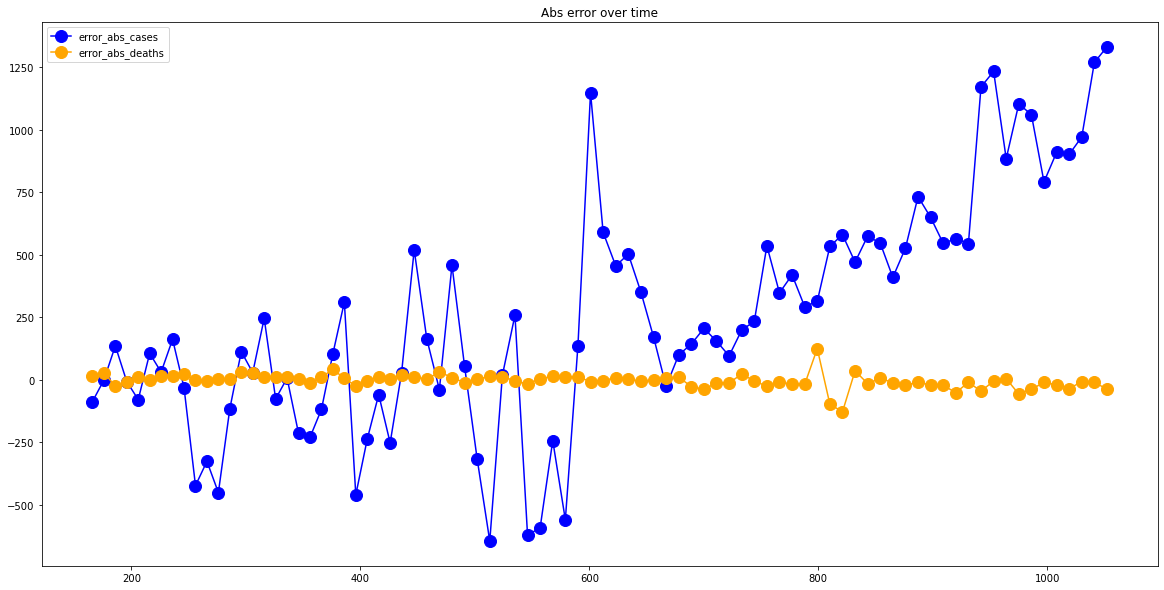

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  225.53571428571428
RMSE =  374.7878288667692
-- Turkey performances for deaths --
MAE =  22.214285714285715
RMSE =  110.7528350706675


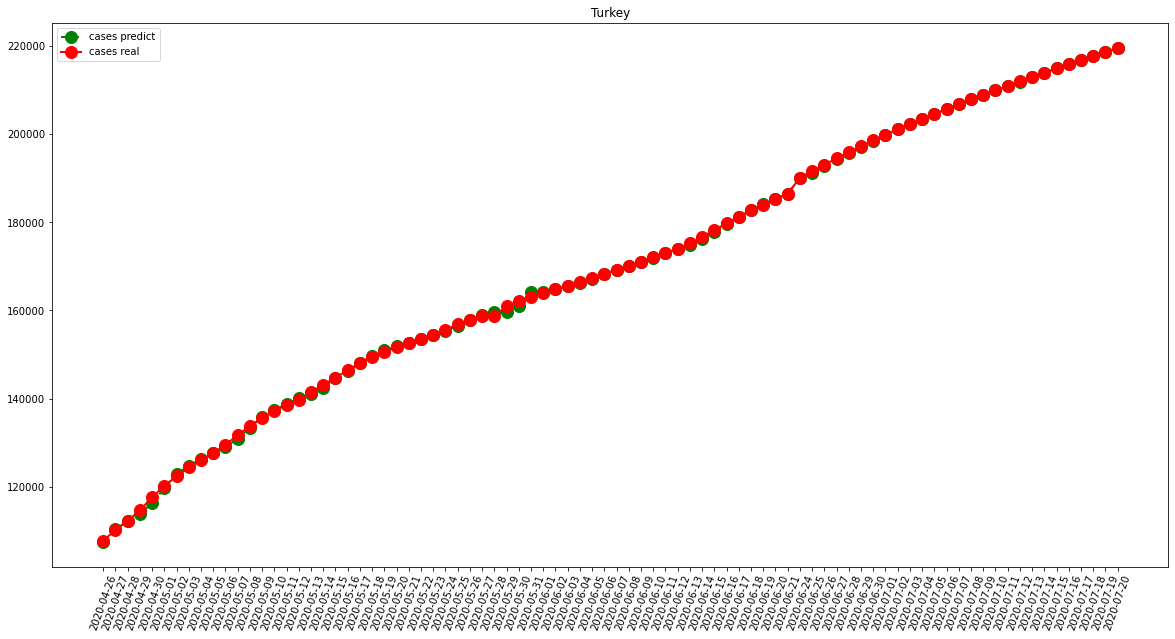

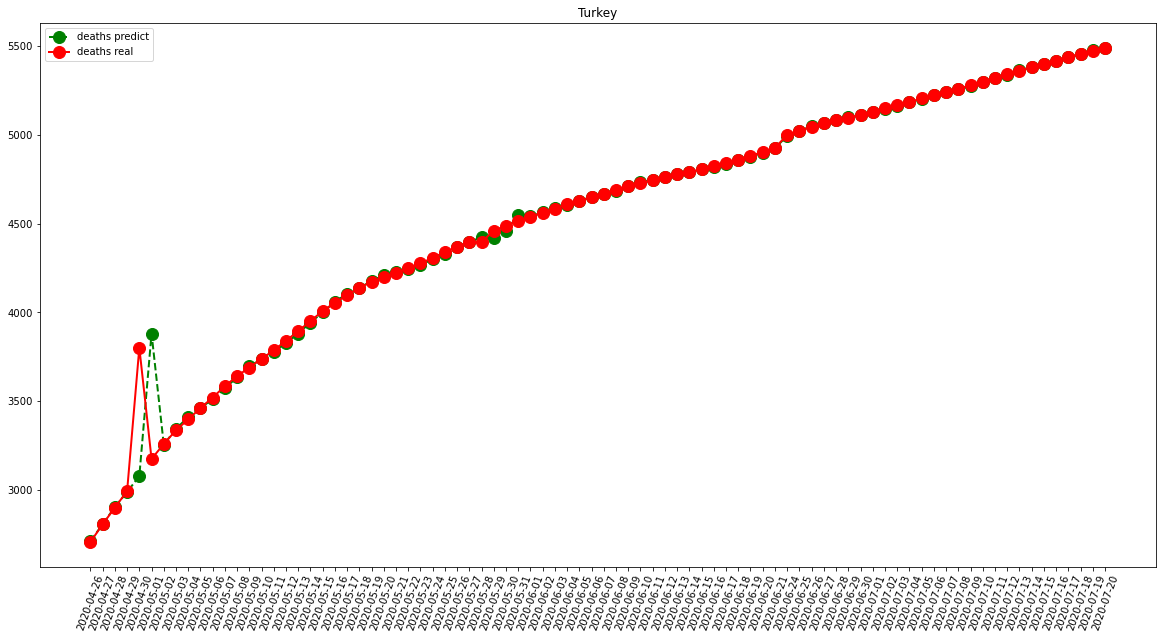

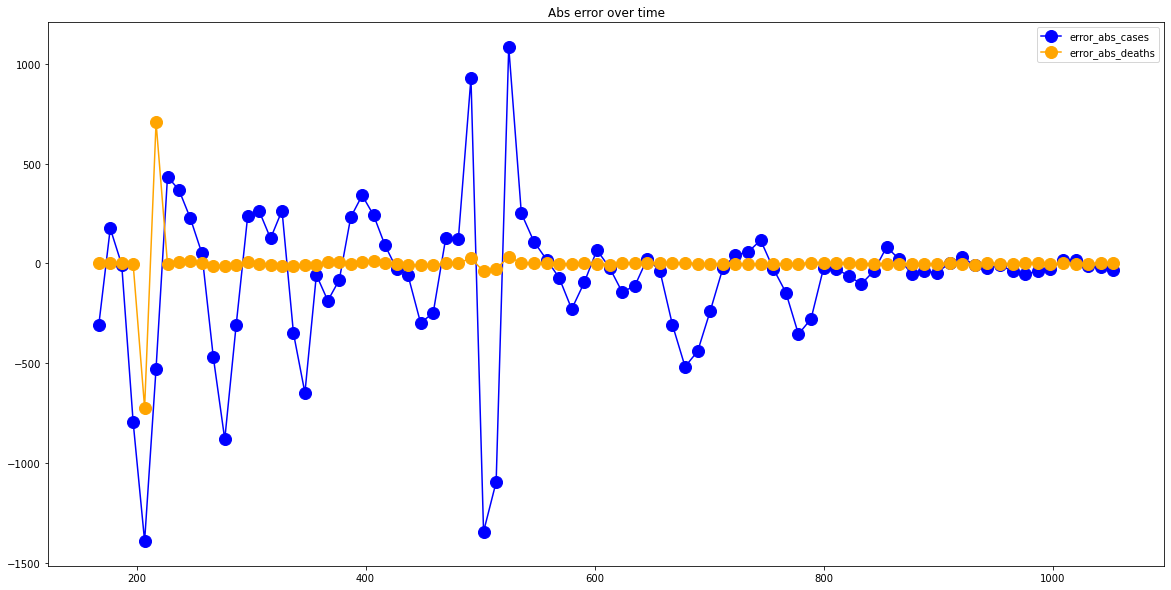

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10160.333333333334
RMSE =  13300.062833910406
-- Brazil performances for deaths --
MAE =  374.10526315789474
RMSE =  461.5668965599678


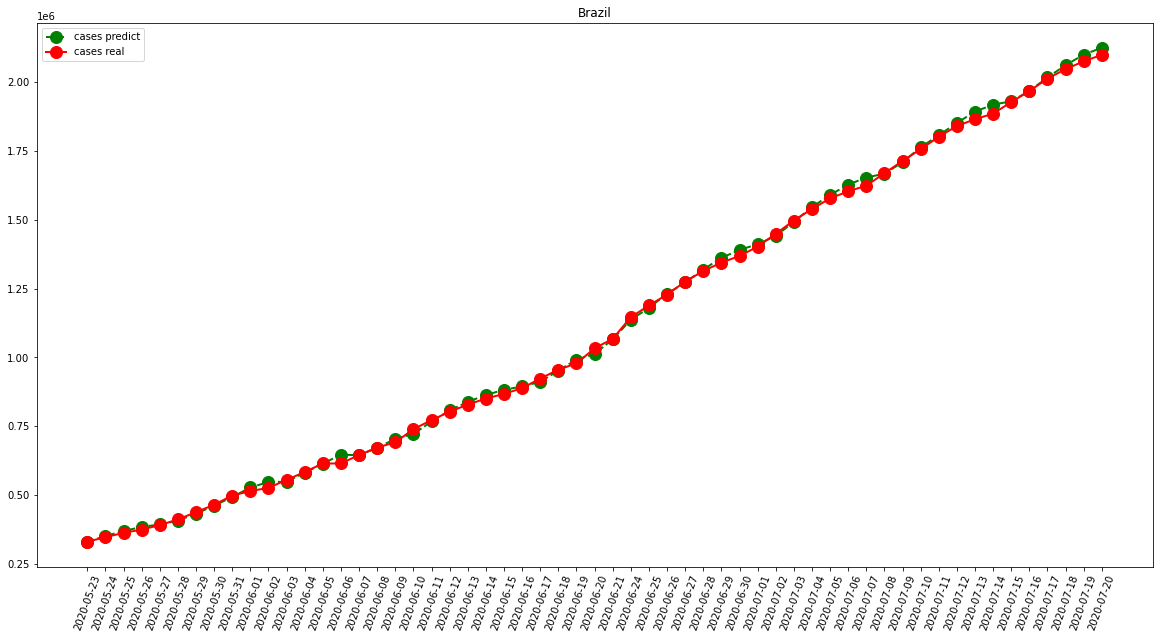

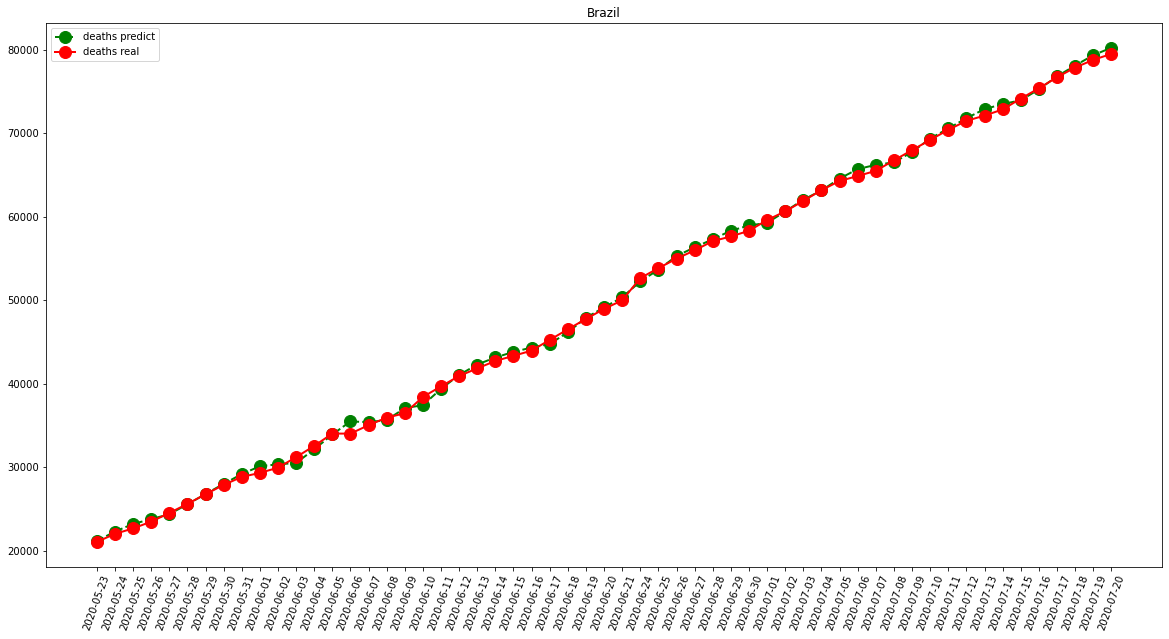

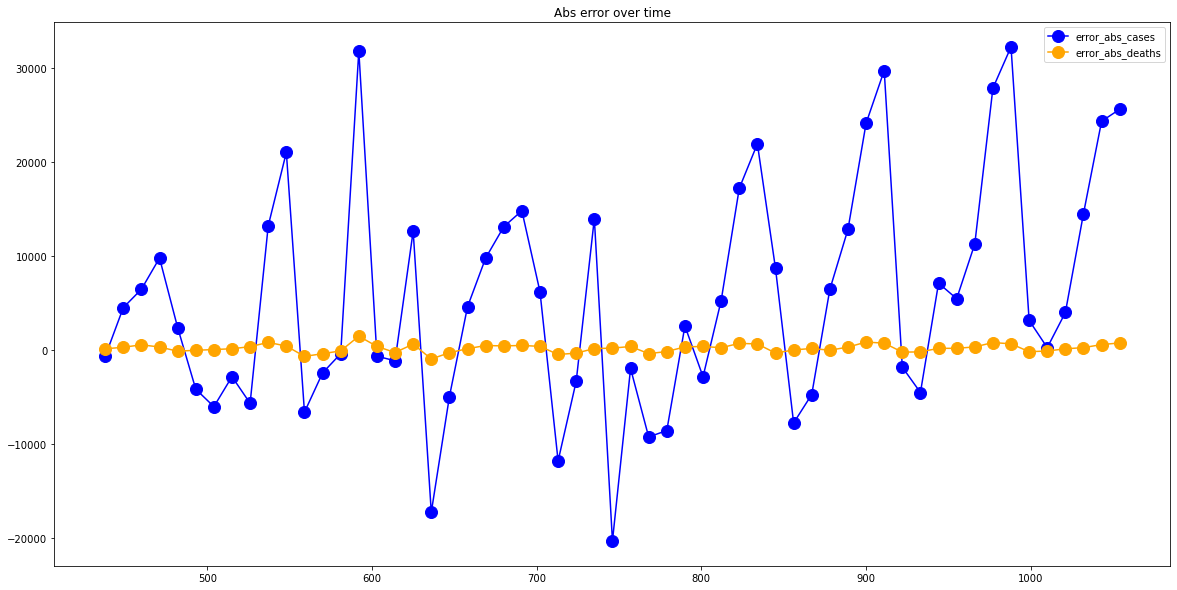

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)